# Visualizing average coverage across the genome

**Date**: 2020-02-17   
**Author**: Katarina Braun 

- Look at the average coverage of each gene segment in each sample 
- Use `sample_coverage.tsv` files generated from `Sniffles` pipeline

#### import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt

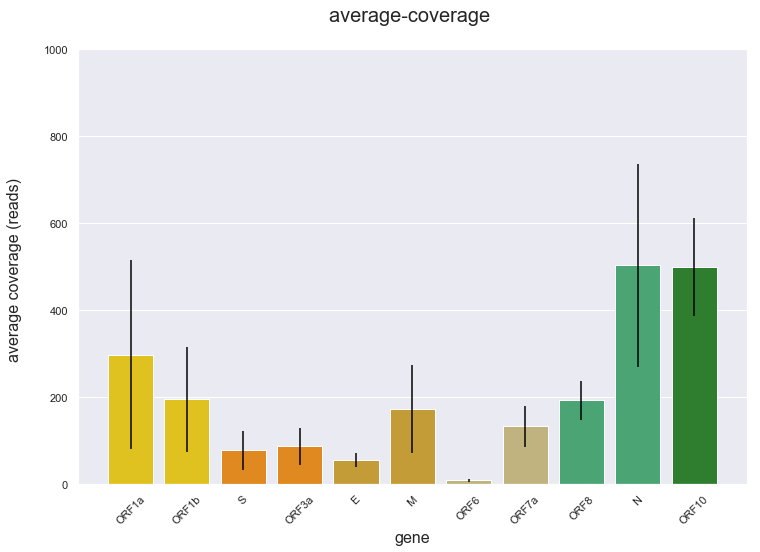

In [2]:
# modify the VCF file into a CSV file so I can load it easily into a Pandas dataframe

# load rep1 CSV into Pandas dataframe 
swab = pd.read_csv(filepath_or_buffer='swab_coverage.tsv', header=0, sep='\t', low_memory=False)

# modify first column to contain gene name only 
swab['gene'] = swab['#ID'].str[11:]

# drop columns that are not needed (i.e. "Length")
swab = swab.drop(['#ID', 'Length', 'Ref_GC', 'Covered_bases', 'Plus_reads', 'Minus_reads', 'Read_GC', 'Median_fold'], axis=1)

# reorder columns
swab = swab[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# set column1 (gene + rep#) as index
swab.set_index('gene', inplace=True)

# reorder the rows so replicate 1 and 2 are next to each other 
# have to change column headers for CA04 from H7 and N9 to H1 AND N1 
swab = pd.DataFrame(swab, index=['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# save coverage dataframe to a CSV file for later reference 
swab.to_csv('swab_coverage.csv', sep='\t')

# turn index back into a column to plot as x values
swab.reset_index(inplace=True)
swab['gene'] = swab['index']
swab = swab.drop(['index'], axis=1)
swab = swab[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# plot 'Avg_fold' +/- 'Std_Dev' as bar graphs for each segment
plt.figure(figsize=(12,8))
clrs = ['gold', 'gold', 'darkorange', 'darkorange', 'goldenrod', 'goldenrod', 'y', 'y', 'mediumseagreen', 'mediumseagreen', 'forestgreen', 'forestgreen', 'c', 'c', 'skyblue', 'skyblue']
ax = sns.barplot('gene', 'Avg_fold', data=swab, palette=clrs)
plt.errorbar(x=swab['gene'],y=swab['Avg_fold'],yerr=(swab['Std_Dev']), fmt='none', c = 'black')
ax.set(ylim=(0,1000))
plt.title('average-coverage \n', fontsize=20)
plt.xlabel('gene', fontsize=16)
plt.ylabel('average coverage (reads) \n', fontsize=16)
ax.set_xticklabels(swab['gene'], rotation=45)
plt.savefig('swab_average-coverage.pdf')


###

# ##

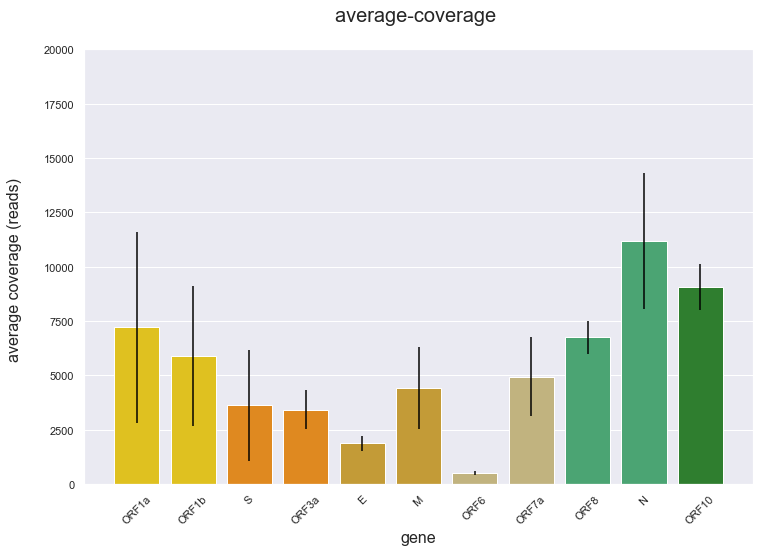

In [3]:
# modify the VCF file into a CSV file so I can load it easily into a Pandas dataframe

# load rep1 CSV into Pandas dataframe 
V1 = pd.read_csv(filepath_or_buffer='vero76_coverage.tsv', header=0, sep='\t', low_memory=False)

# modify first column to contain gene name only 
V1['gene'] = V1['#ID'].str[11:]

# drop columns that are not needed (i.e. "Length")
V1 = V1.drop(['#ID', 'Length', 'Ref_GC', 'Covered_bases', 'Plus_reads', 'Minus_reads', 'Read_GC', 'Median_fold'], axis=1)

# reorder columns
V1 = V1[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# set column1 (gene + rep#) as index
V1.set_index('gene', inplace=True)

# reorder the rows so replicate 1 and 2 are next to each other 
# have to change column headers for CA04 from H7 and N9 to H1 AND N1 
V1 = pd.DataFrame(V1, index=['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# save coverage dataframe to a CSV file for later reference 
V1.to_csv('vero76_coverage.csv', sep='\t')

# turn index back into a column to plot as x values
V1.reset_index(inplace=True)
V1['gene'] = V1['index']
V1 = V1.drop(['index'], axis=1)
V1 = V1[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# plot 'Avg_fold' +/- 'Std_Dev' as bar graphs for each segment
plt.figure(figsize=(12,8))
clrs = ['gold', 'gold', 'darkorange', 'darkorange', 'goldenrod', 'goldenrod', 'y', 'y', 'mediumseagreen', 'mediumseagreen', 'forestgreen', 'forestgreen', 'c', 'c', 'skyblue', 'skyblue']
ax = sns.barplot('gene', 'Avg_fold', data=V1, palette=clrs)
plt.errorbar(x=V1['gene'],y=V1['Avg_fold'],yerr=(V1['Std_Dev']), fmt='none', c = 'black')
ax.set(ylim=(0,20000))
plt.title('average-coverage \n', fontsize=20)
plt.xlabel('gene', fontsize=16)
plt.ylabel('average coverage (reads) \n', fontsize=16)
ax.set_xticklabels(V1['gene'], rotation=45)
plt.savefig('vero76_average-coverage.pdf')


###


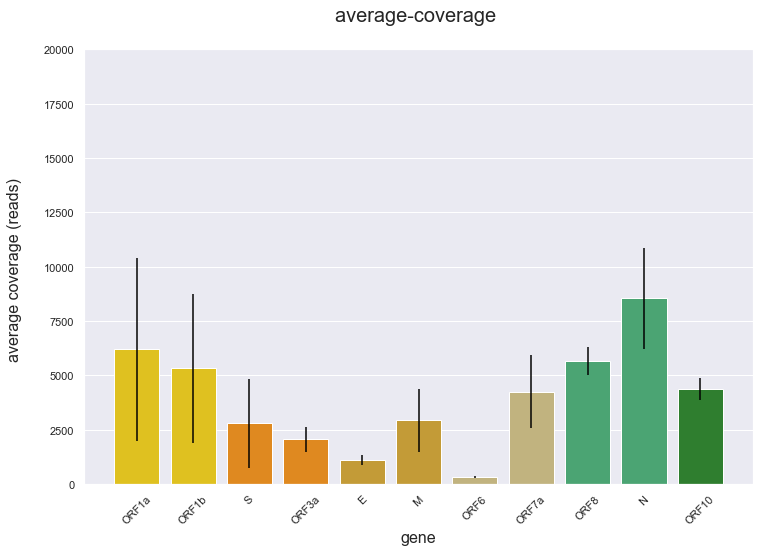

In [4]:
# modify the VCF file into a CSV file so I can load it easily into a Pandas dataframe

# load rep1 CSV into Pandas dataframe 
V2 = pd.read_csv(filepath_or_buffer='veroE6_coverage.tsv', header=0, sep='\t', low_memory=False)

# modify first column to contain gene name only 
V2['gene'] = V2['#ID'].str[11:]

# drop columns that are not needed (i.e. "Length")
V2 = V2.drop(['#ID', 'Length', 'Ref_GC', 'Covered_bases', 'Plus_reads', 'Minus_reads', 'Read_GC', 'Median_fold'], axis=1)

# reorder columns
V2 = V2[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# set column1 (gene + rep#) as index
V2.set_index('gene', inplace=True)

# reorder the rows so replicate 1 and 2 are next to each other 
# have to change column headers for CA04 from H7 and N9 to H1 AND N1 
V2 = pd.DataFrame(V2, index=['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# save coverage dataframe to a CSV file for later reference 
V2.to_csv('veroE6_coverage.csv', sep='\t')

# turn index back into a column to plot as x values
V2.reset_index(inplace=True)
V2['gene'] = V2['index']
V2 = V2.drop(['index'], axis=1)
V2 = V2[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# plot 'Avg_fold' +/- 'Std_Dev' as bar graphs for each segment
plt.figure(figsize=(12,8))
clrs = ['gold', 'gold', 'darkorange', 'darkorange', 'goldenrod', 'goldenrod', 'y', 'y', 'mediumseagreen', 'mediumseagreen', 'forestgreen', 'forestgreen', 'c', 'c', 'skyblue', 'skyblue']
ax = sns.barplot('gene', 'Avg_fold', data=V2, palette=clrs)
plt.errorbar(x=V2['gene'],y=V2['Avg_fold'],yerr=(V2['Std_Dev']), fmt='none', c = 'black')
ax.set(ylim=(0,20000))
plt.title('average-coverage \n', fontsize=20)
plt.xlabel('gene', fontsize=16)
plt.ylabel('average coverage (reads) \n', fontsize=16)
ax.set_xticklabels(V2['gene'], rotation=45)
plt.savefig('veroE6_average-coverage.pdf')


###

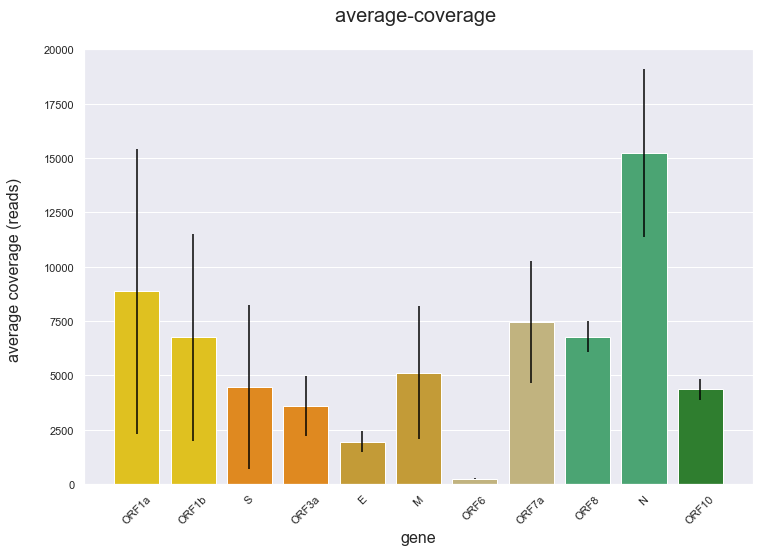

In [5]:
# modify the VCF file into a CSV file so I can load it easily into a Pandas dataframe

# load rep1 CSV into Pandas dataframe 
V3 = pd.read_csv(filepath_or_buffer='veroSTAT1KO_coverage.tsv', header=0, sep='\t', low_memory=False)

# modify first column to contain gene name only 
V3['gene'] = V3['#ID'].str[11:]

# drop columns that are not needed (i.e. "Length")
V3 = V3.drop(['#ID', 'Length', 'Ref_GC', 'Covered_bases', 'Plus_reads', 'Minus_reads', 'Read_GC', 'Median_fold'], axis=1)

# reorder columns
V3 = V3[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# set column1 (gene + rep#) as index
V3.set_index('gene', inplace=True)

# reorder the rows so replicate 1 and 2 are next to each other 
# have to change column headers for CA04 from H7 and N9 to H1 AND N1 
V3 = pd.DataFrame(V3, index=['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# save coverage dataframe to a CSV file for later reference 
V3.to_csv('veroSTAT1KO_coverage.csv', sep='\t')

# turn index back into a column to plot as x values
V3.reset_index(inplace=True)
V3['gene'] = V3['index']
V3 = V3.drop(['index'], axis=1)
V3 = V3[['gene', 'Covered_percent', 'Avg_fold', 'Std_Dev']]

# plot 'Avg_fold' +/- 'Std_Dev' as bar graphs for each segment
plt.figure(figsize=(12,8))
clrs = ['gold', 'gold', 'darkorange', 'darkorange', 'goldenrod', 'goldenrod', 'y', 'y', 'mediumseagreen', 'mediumseagreen', 'forestgreen', 'forestgreen', 'c', 'c', 'skyblue', 'skyblue']
ax = sns.barplot('gene', 'Avg_fold', data=V3, palette=clrs)
plt.errorbar(x=V3['gene'],y=V3['Avg_fold'],yerr=(V3['Std_Dev']), fmt='none', c = 'black')
ax.set(ylim=(0,20000))
plt.title('average-coverage \n', fontsize=20)
plt.xlabel('gene', fontsize=16)
plt.ylabel('average coverage (reads) \n', fontsize=16)
ax.set_xticklabels(V3['gene'], rotation=45)
plt.savefig('veroSTAT1KO_average-coverage.pdf')
 

###